In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re

from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 경고표시 지우기
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
filepath = "./data/model/model_lstm_220110.h5"

model = load_model(filepath, custom_objects=None, compile=True)

In [8]:
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

['생크림이', '좀더', '듬뿍', '올라가고', ',', '시트가', '더', '부드러우면', '더', '맛있을거같다', '우유향이', '나고', '부드러운', '생크림', '신선하고', '새콤달콤한', '딸기', '드립커피도', '꽤', '괜찮은', '편', '양에', '비해', '비싸지만', '만족스러운', '딸기케이크였다']
['굿굿', '!', '']
['맛있어요']
['맛있어요']
['진짜', '유명해서', '한번', '먹어봄', '생딸기가', '아니고', '절임딸기', '한조각', '6300원', '시트도', '퍼석하고', '크림은', '그냥그럼', '이게', '맛있다는', '분들은', '생딸기를', '안드셔보셨거나', '생딸기를', '너무', '많이', '먹어서', '질려서', '맛있으신듯', '내', '돈', '내', '시간', '']


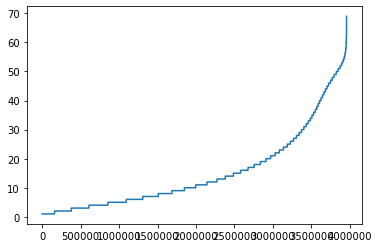

3401248
['생크림이', '좀더', '듬뿍', '올라가고', ',', '시트가', '더', '부드러우면', '더', '맛있을거같', '우유향이', '나고', '부드러운', '생크림', '신선하고', '새콤달콤한', '딸기', '드립커피도', '꽤', '괜찮은', '편', '양에', '비해', '비싸지만', '만족스러운', '딸기케이크']
['굿굿', '!', '']
['맛있어요']
['맛있어요']
['진짜', '유명해서', '한번', '먹어봄', '생딸기가', '아니고', '절임딸기', '한조각', '6300원', '시트도', '퍼석하고', '크림은', '그냥그럼', '이게', '맛있다는', '분들은', '생딸기를', '안드셔보셨', '생딸기를', '너무', '많이', '먹어서', '질려서', '맛있으신듯', '내', '돈', '내', '시간', '']


In [3]:
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

df = pd.read_csv("./data/review_data/total_review.csv", encoding="utf-8-sig", index_col=0)
review_df = df.dropna(axis=0)

# 컬럼 재배치
# review_df = review_df[["review","score"]]

# clean_str 함수를 통해서 X데이터를 정제해주어야함.
train_test_X = [clean_str(sentence) for sentence in review_df["review"]]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_test_X]
for i in range(5):
    print(sentences[i])

# 문장의 길이를 그래프화
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

# 총 3956974행의 데이터 중 30문장이내의 데이터는 3401248으로 85.9%에 육박.
# 따라서, padding의 기준을 30로 잡겠음.
print(sum([int(l<=30) for l in sentence_len]))
    
sentence_new = []
for sentence in sentences:
    sentence_new.append([word[:5] for word in sentence][:30])

sentences = sentence_new

for i in range(5):
    print(sentences[i])

tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(sentences)

In [8]:
mango = pd.read_excel("./data/망고플레이트 리뷰 종합.xlsx")

mango

,Unnamed: 0,이름,평점,주소,주력 메뉴,가격대,망고플레이트 주소,리뷰내용
0,3869.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 가로수길에 있는 오랜 참치맛집 e-청우참치위치를 옮기다!!원래...
1,3865.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,"\n 가성비 너무 좋고, 정말 양질의 참치를 양껏 즐길 수 있어서 ..."
2,3867.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 가성비 좋은 한국식 참치횟집. 선도가 꽤 좋다. 카운터석도 있...
3,3868.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 그저 박수만. 참치땡길때 여기만한 곳이 없다.\n
4,3863.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 맛있다.. 느끼해서 많이 못먹는게 함정.\n
...,...,...,...,...,...,...,...,...
36203,NaN,키미노돼지국밥,-,서울특별시 중랑구 중랑천로10길 92 1F,\n탕 / 찌개 / 전골\n,만원 미만,https://www.mangoplate.com//restaurants/OGDe64...,\n 뜨끈한 돼지국밥 생각 날 때 자주 찾는 곳.멀리서도 먹으러 찾...
36204,NaN,조개나루터,-,서울특별시 중랑구 중랑천로12길 59,\n해산물 요리\n,NaN,https://www.mangoplate.com//restaurants/MgyUt1...,\n 11월말에 처음 가보고나서 12~1월두달동안 벌써 8번이나 다...
36205,NaN,조개나루터,-,서울특별시 중랑구 중랑천로12길 59,\n해산물 요리\n,NaN,https://www.mangoplate.com//restaurants/MgyUt1...,\n 가리비크기 미친거아닌가요.......내일 또갈래요..........
36206,NaN,제주돈선생,-,서울특별시 중랑구 중랑천로12길 61,\n고기 요리\n,만원-2만원,https://www.mangoplate.com//restaurants/JtAAHT...,"\n 굳이 없는 식당까지 등록해가며 쓰지 않는데, 고기도 맛있고 사..."


In [16]:
mango_sentence = []
for review in mango.iloc[:20,-1]:
    mango_sentence.append(review)
    
mango_sentence

mango_score = []
for score in mango.iloc[:20,2]:
    mango_score.append(score)
    
mango_score

['\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.3\n',
 '\n4.3\n',
 '\n4.3\n',
 '\n4.3\n',
 '\n4.3\n']

In [18]:
cnt = 0

# 망고플레이트 리뷰 테스트
for review in mango_sentence:
    test_sentence = review
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    now_sentence = []
    for word in test_sentence:
        now_sentence.append(word)
        test_sentences.append(now_sentence[:])

    test_X_1 = tokenizer.texts_to_sequences(test_sentences)
    test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=30)
    prediction = model.predict(test_X_1)
    for idx, sentence in enumerate(test_sentences):
#         print(sentence)
#         print((prediction[idx]).round(3))
        review_score = np.argmax((prediction[idx]).round(3))
    # print(review)
    print(review_score)
    print(mango_score[cnt])
    print("-"*70)
    cnt+=1

# tmp_score_list = []
# cnt = 1

# for data in review_score:
#     if not tmp_score_list:
#         tmp_score_list.append(data)
#     else:
#         tmp_score_list.append(data)
#         if tmp_score_list[0] > tmp_score_list[1]:
#             del tmp_score_list[1]
#         else:
#             del tmp_score_list[0]
    
# print(tmp_score_list)
    
# print(tmp_score_list)
# 띄어쓰기 기준으로 끊는 것이니 

5

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
3

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
3

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
3

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
5

4.5

--------------------------------------------

In [32]:
import random

cnt = 0

mango_store_list = []

for store in mango["이름"].unique():
    mango_store_list.append(store)

choiceList = random.choice(mango_store_list)

data = mango[mango["이름"]==choiceList]

score = 0

# 망고플레이트 리뷰 테스트
for review in data.iloc[:,-1]:
    test_sentence = review
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    now_sentence = []
    for word in test_sentence:
        now_sentence.append(word)
        test_sentences.append(now_sentence[:])

    test_X_1 = tokenizer.texts_to_sequences(test_sentences)
    test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=30)
    prediction = model.predict(test_X_1)
    for idx, sentence in enumerate(test_sentences):
#         print(sentence)
#         print((prediction[idx]).round(3))
        review_score = np.argmax((prediction[idx]).round(3))
    # print(review)
    print(review_score)
#     print(mango_score[cnt])
    print("-"*70)
    cnt+=1

[0.    0.032 0.785 0.135 0.004 0.044]
----------------------------------------------------------------------
[0.    0.002 0.001 0.02  0.084 0.894]
----------------------------------------------------------------------
[0.    0.915 0.    0.01  0.074 0.   ]
----------------------------------------------------------------------
[0.    0.    0.    0.    0.913 0.086]
----------------------------------------------------------------------
[0.    0.    0.002 0.927 0.064 0.007]
----------------------------------------------------------------------
[0. 0. 0. 0. 0. 1.]
----------------------------------------------------------------------
[0.    0.    0.365 0.635 0.    0.   ]
----------------------------------------------------------------------
[0.    0.044 0.385 0.12  0.158 0.293]
----------------------------------------------------------------------
[0.    0.013 0.829 0.095 0.023 0.04 ]
----------------------------------------------------------------------
[0. 0. 0. 1. 0. 0.]
-----------------